# seaborn (countplot) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.22.0
seaborn version = 0.8.1


## read miles per gallon dataset (mpg.csv)

In [3]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


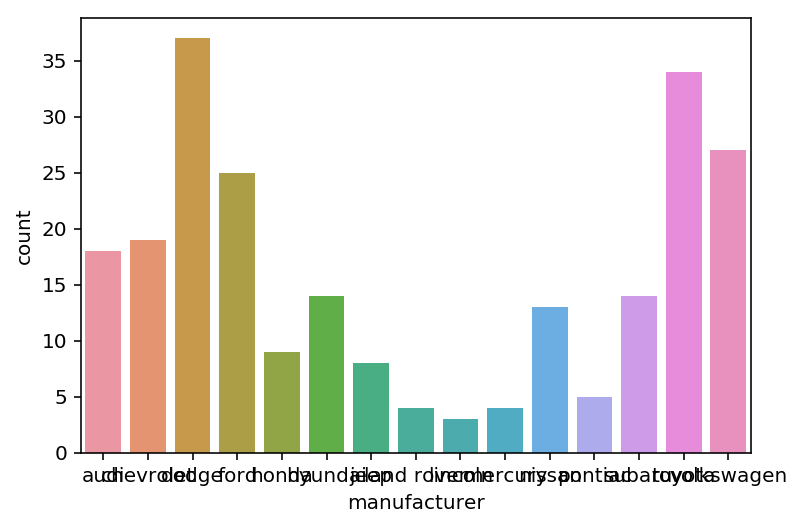

In [4]:
sns.countplot(x='manufacturer', data=df)

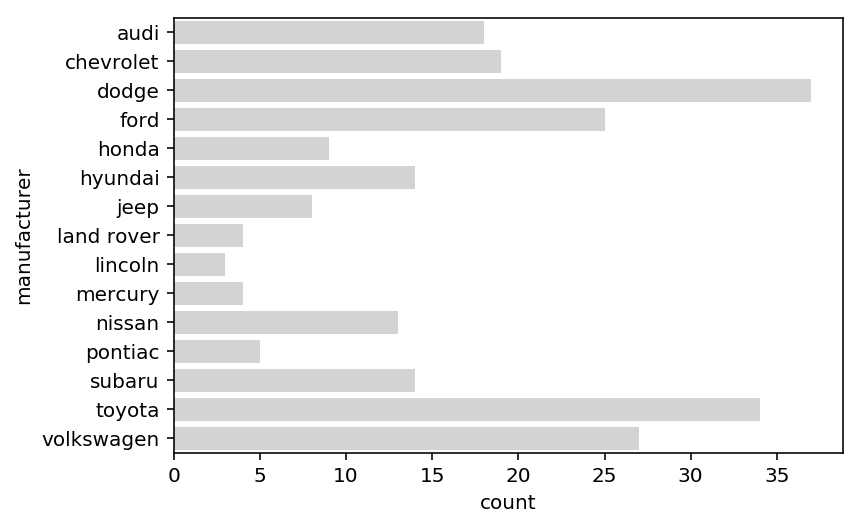

In [5]:
sns.countplot(y='manufacturer', data=df, color='lightgray')

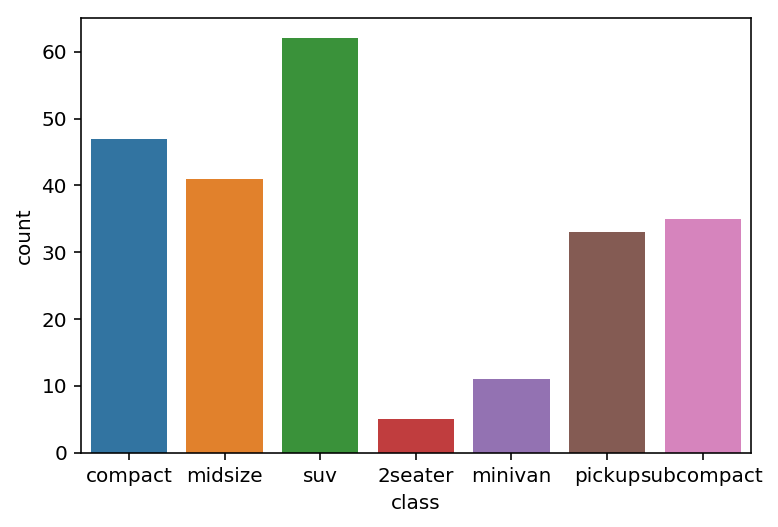

In [6]:
sns.countplot(x='class', data=df)

### set chart (figure) size

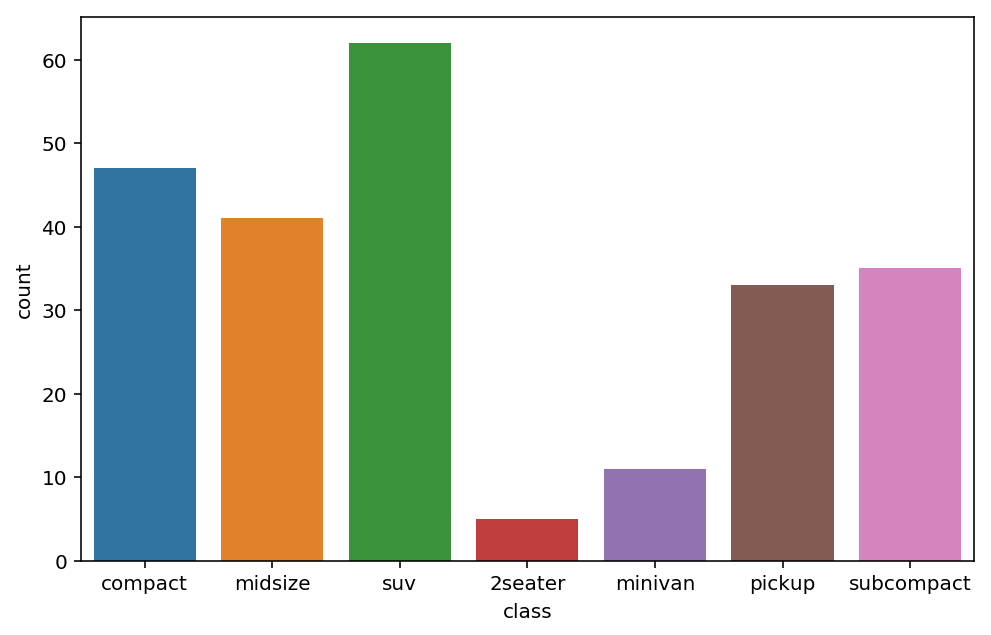

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df);

### count discrete variable

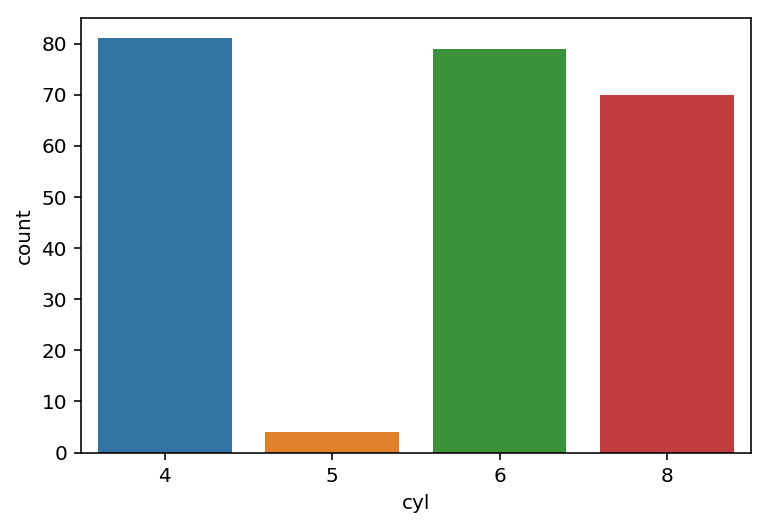

In [8]:
sns.countplot(x='cyl', data=df)

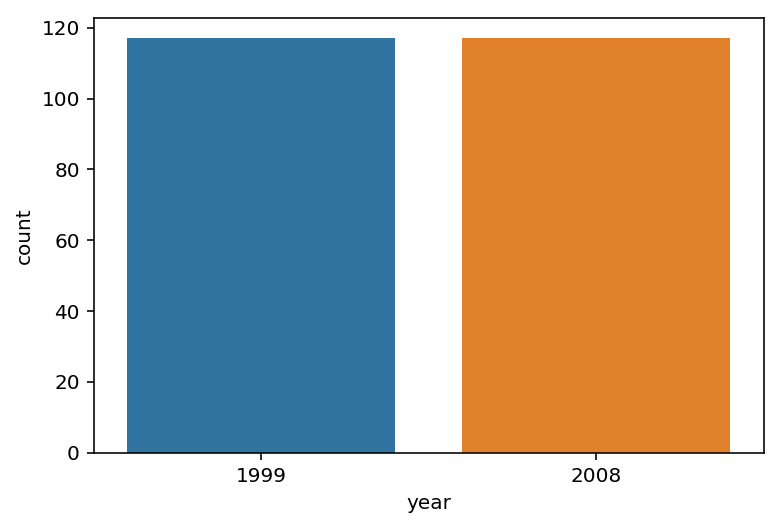

In [9]:
sns.countplot(x='year', data=df)

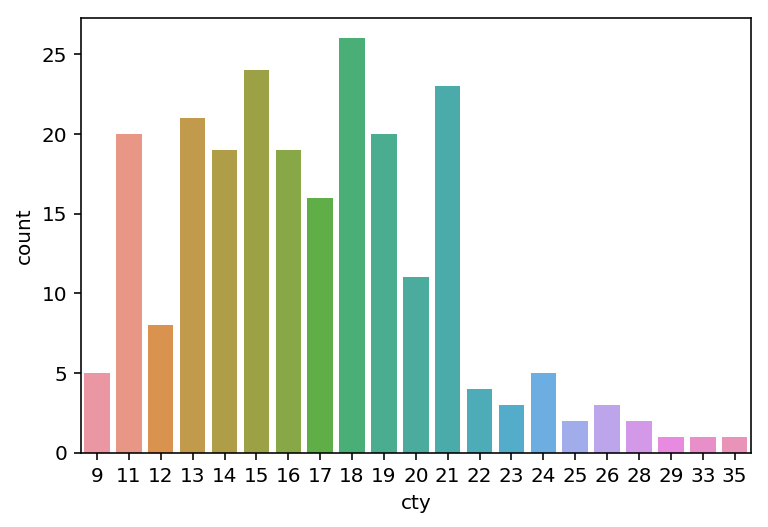

In [10]:
sns.countplot(x='cty', data=df)

### countplot order by value_counts

In [11]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [12]:
df['class'].value_counts().index

Index(['suv', 'compact', 'midsize', 'subcompact', 'pickup', 'minivan',
       '2seater'],
      dtype='object')

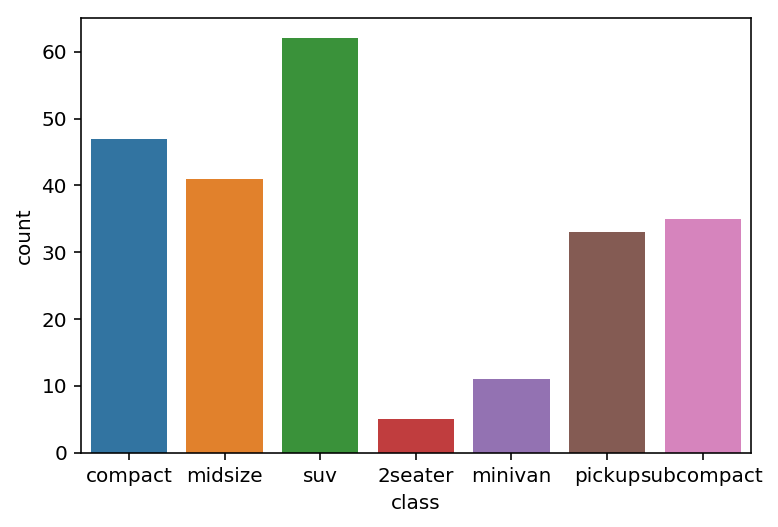

In [13]:
sns.countplot(x = 'class', data = df)

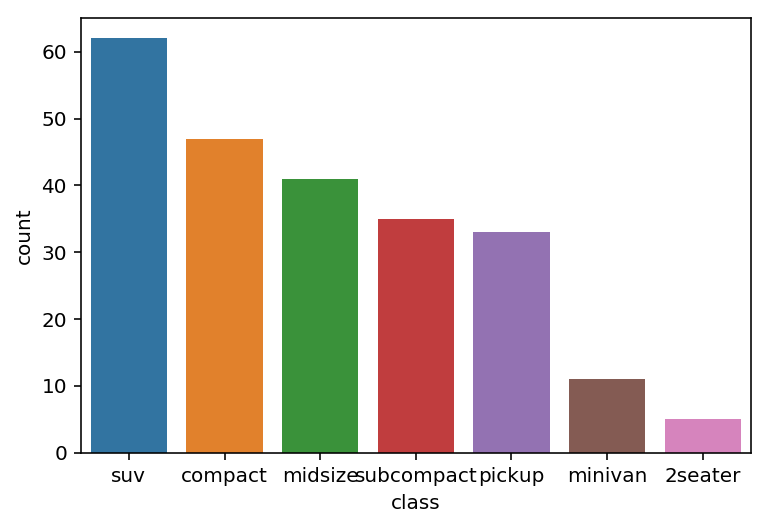

In [14]:
sns.countplot(x = 'class', data = df,
              order = df['class'].value_counts().index)

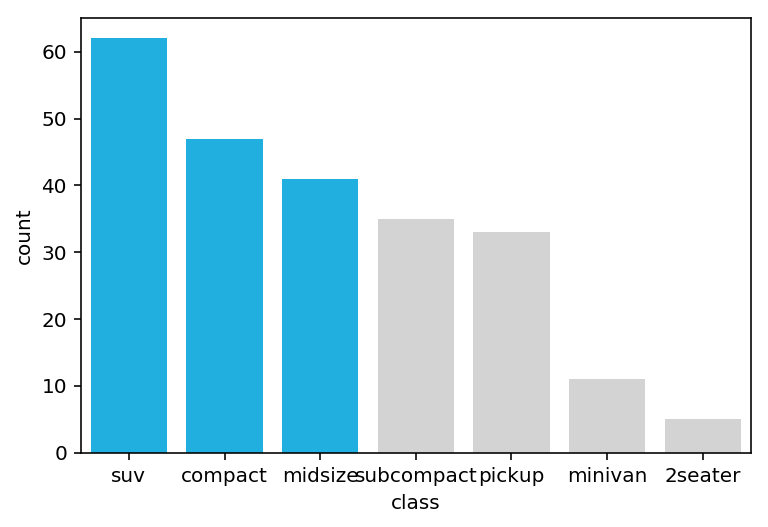

In [17]:
# p = ['maroon','lightgray','maroon','deepskyblue','maroon','maroon','maroon']
p = ["deepskyblue" if v > 40 else "lightgray" for v in df['class'].value_counts()]
# p = ["deepskyblue" if v == 'pickup' else "lightgray" 
#          for v in df['class'].value_counts().index]

sns.countplot(x='class', data=df,
              palette=p,
              order = df['class'].value_counts().index)

### add horizontal line 

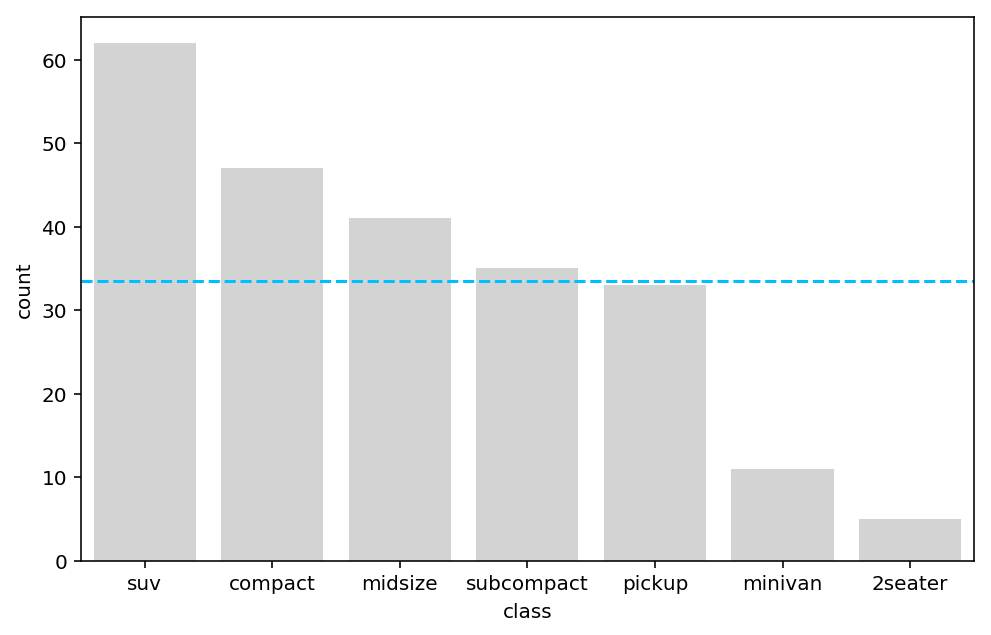

In [33]:
avg=df['class'].value_counts().mean()
plt.figure(figsize=(8,5))
sns.countplot(x = 'class',
              data = df,
              color = 'lightgray',
              order = df['class'].value_counts().index)
plt.axhline(y=avg, linestyle='--', color='deepskyblue')

### add verticle line

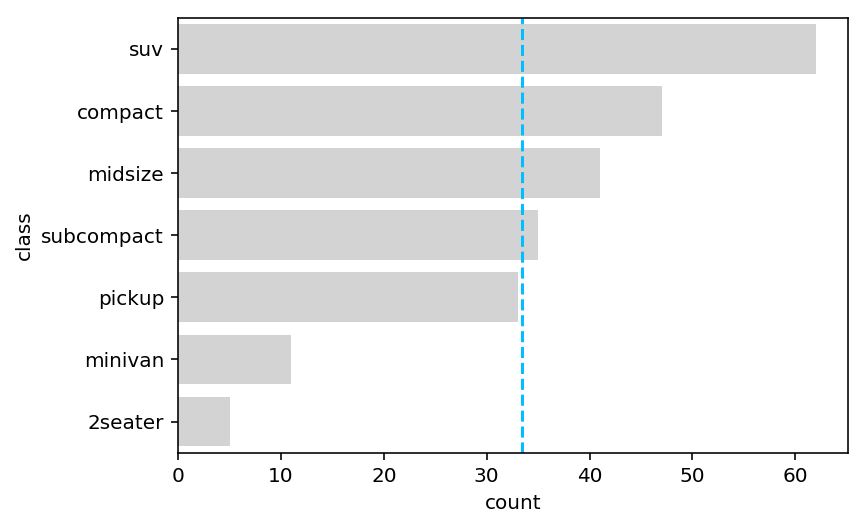

In [19]:
avg=df['class'].value_counts().mean()

sns.countplot(y = 'class',
              data = df,
              color = 'lightgray',
              order = df['class'].value_counts().index)
plt.axvline(x=avg, linestyle='--', color='deepskyblue')
plt.ylabel=''

In [20]:
avg=df['class'].value_counts().mean()
colors = ['tomato' if (x > avg) else 'lightgray' for x in df['class'].value_counts()]
colors

['tomato', 'tomato', 'tomato', 'tomato', 'lightgray', 'lightgray', 'lightgray']

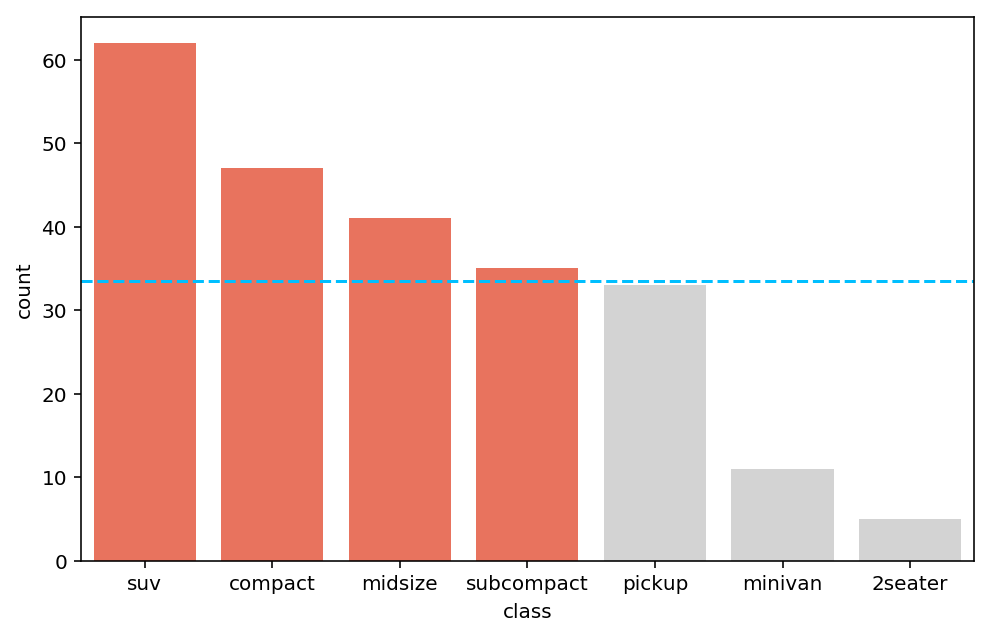

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x = 'class',
              data = df,
              palette = colors,
              order = df['class'].value_counts().index)
plt.axhline(y=avg, linestyle='--', color='deepskyblue')

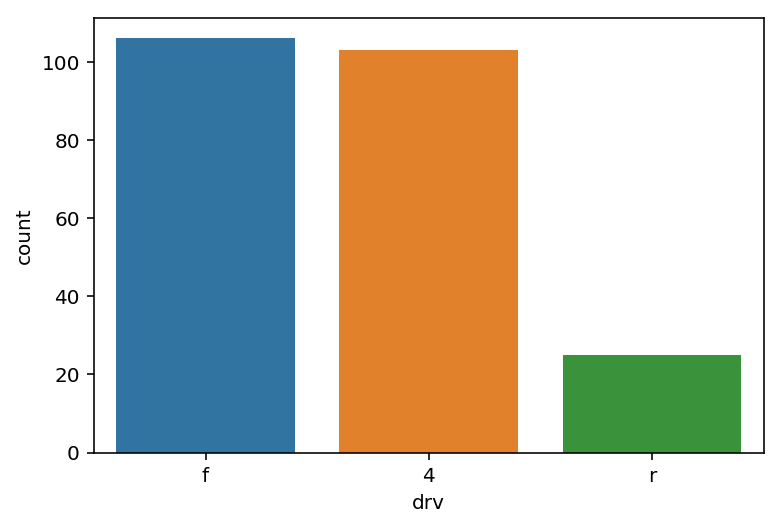

In [22]:
sns.countplot(x='drv', data=df)

### categorize 'drv' column

In [23]:
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact


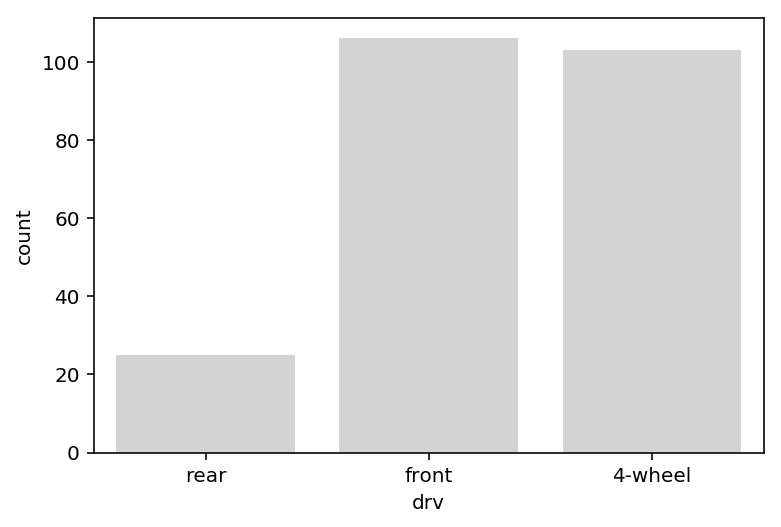

In [26]:
sns.countplot(x='drv', data=df, order=['rear', 'front', '4-wheel'], color='lightgray')

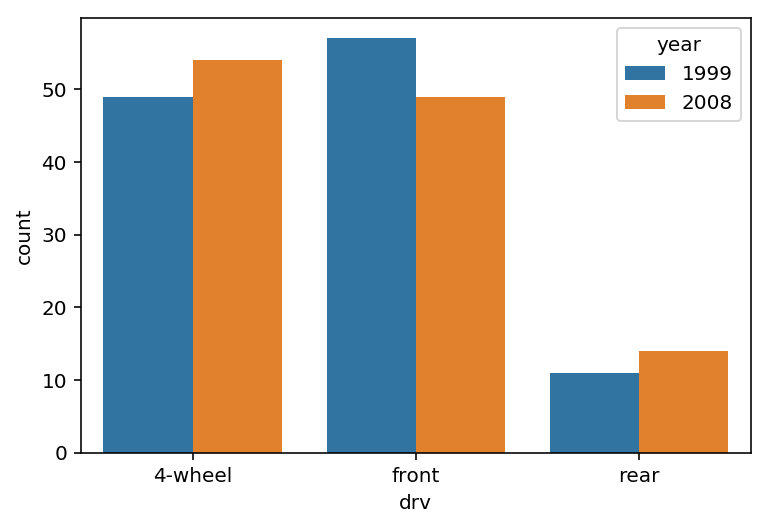

In [27]:
sns.countplot(x='drv', data=df, 
              hue='year')

## create 'gear' column from trans

In [28]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


Text(0.5,1,'demo countplot')

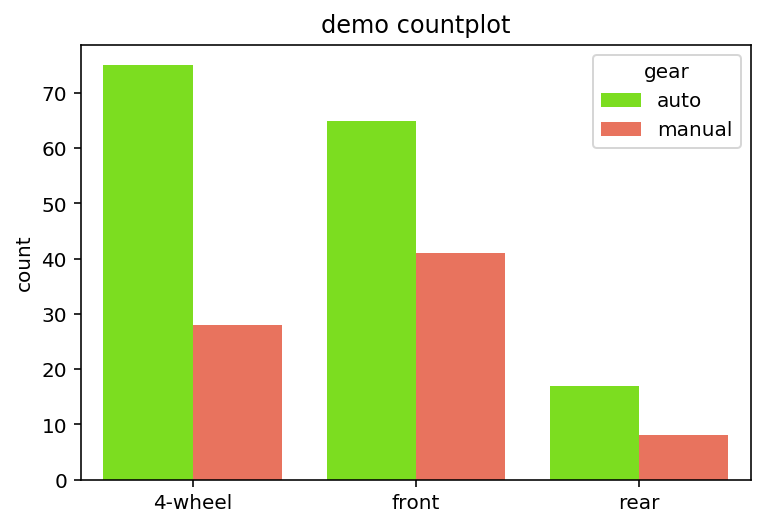

In [31]:
sns.countplot(x='drv', data=df, 
              hue='gear', 
              palette=['lawngreen', 'tomato'])
plt.xlabel('')
plt.title('demo countplot')

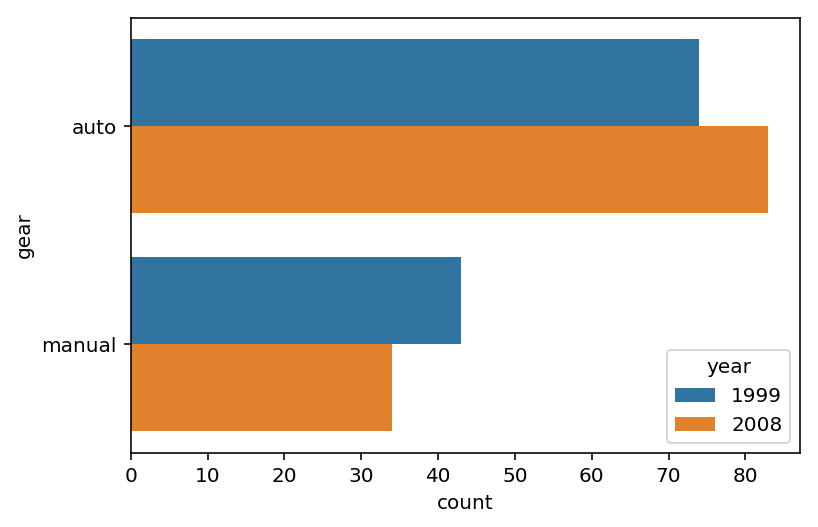

In [32]:
sns.countplot(y="gear", hue="year", data=df)